In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
dataset['Current year'] = 2021

In [12]:
dataset['no. of years'] = dataset['Current year'] - dataset['Year']

In [13]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current year,no. of years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [14]:
dataset.drop(['Year','Current year'], axis =1, inplace=True)

In [15]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no. of years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
dataset = pd.get_dummies(dataset,drop_first =True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no. of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [17]:
dataset.shape

(301, 9)

In [18]:
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no. of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no. of years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [19]:
import seaborn as sns

<AxesSubplot:>

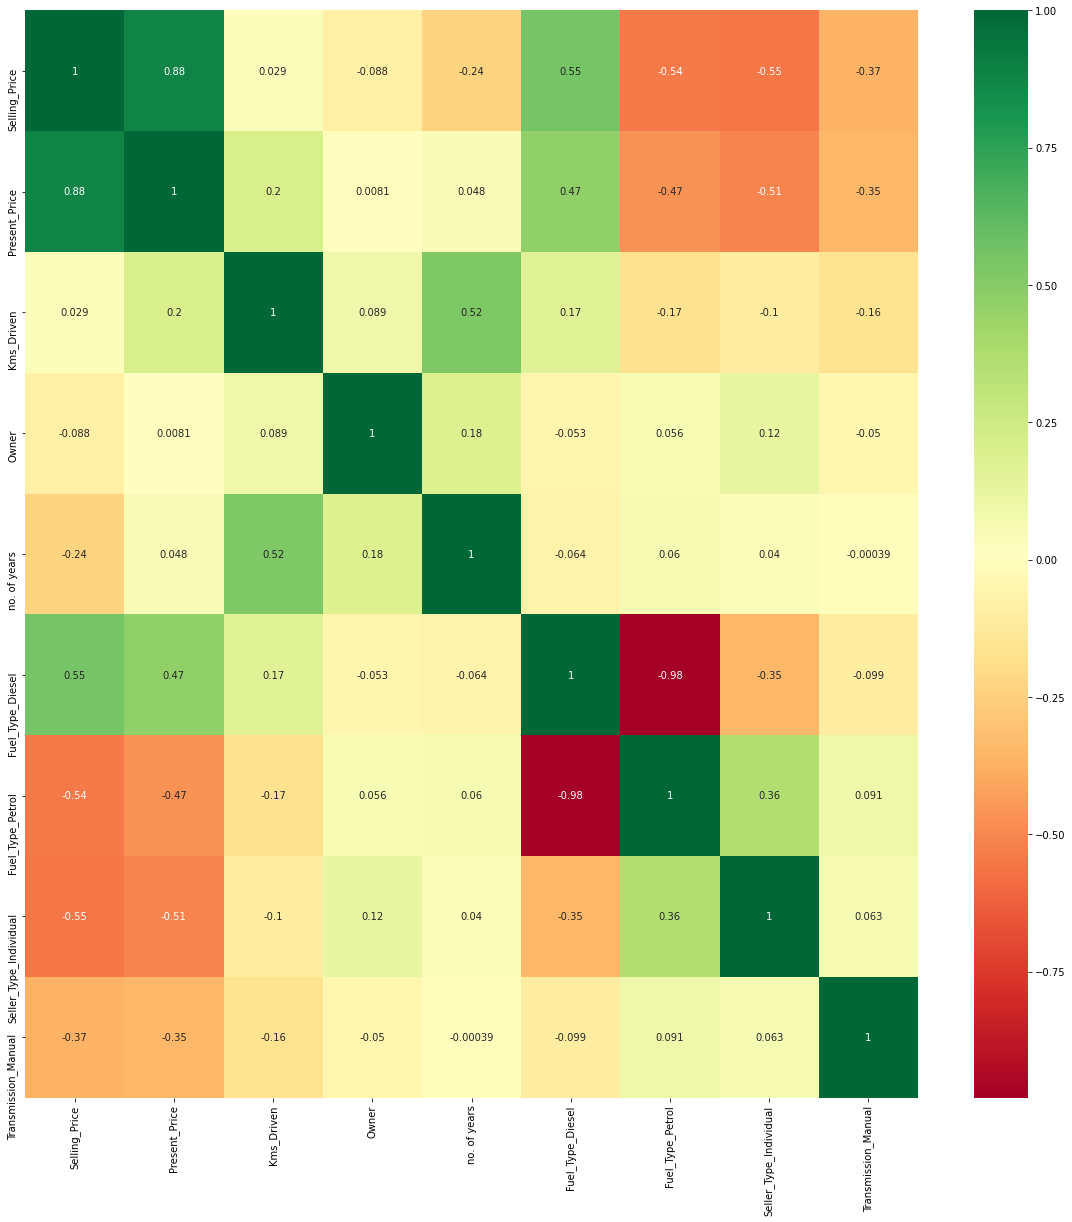

In [20]:
corrmat=dataset.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

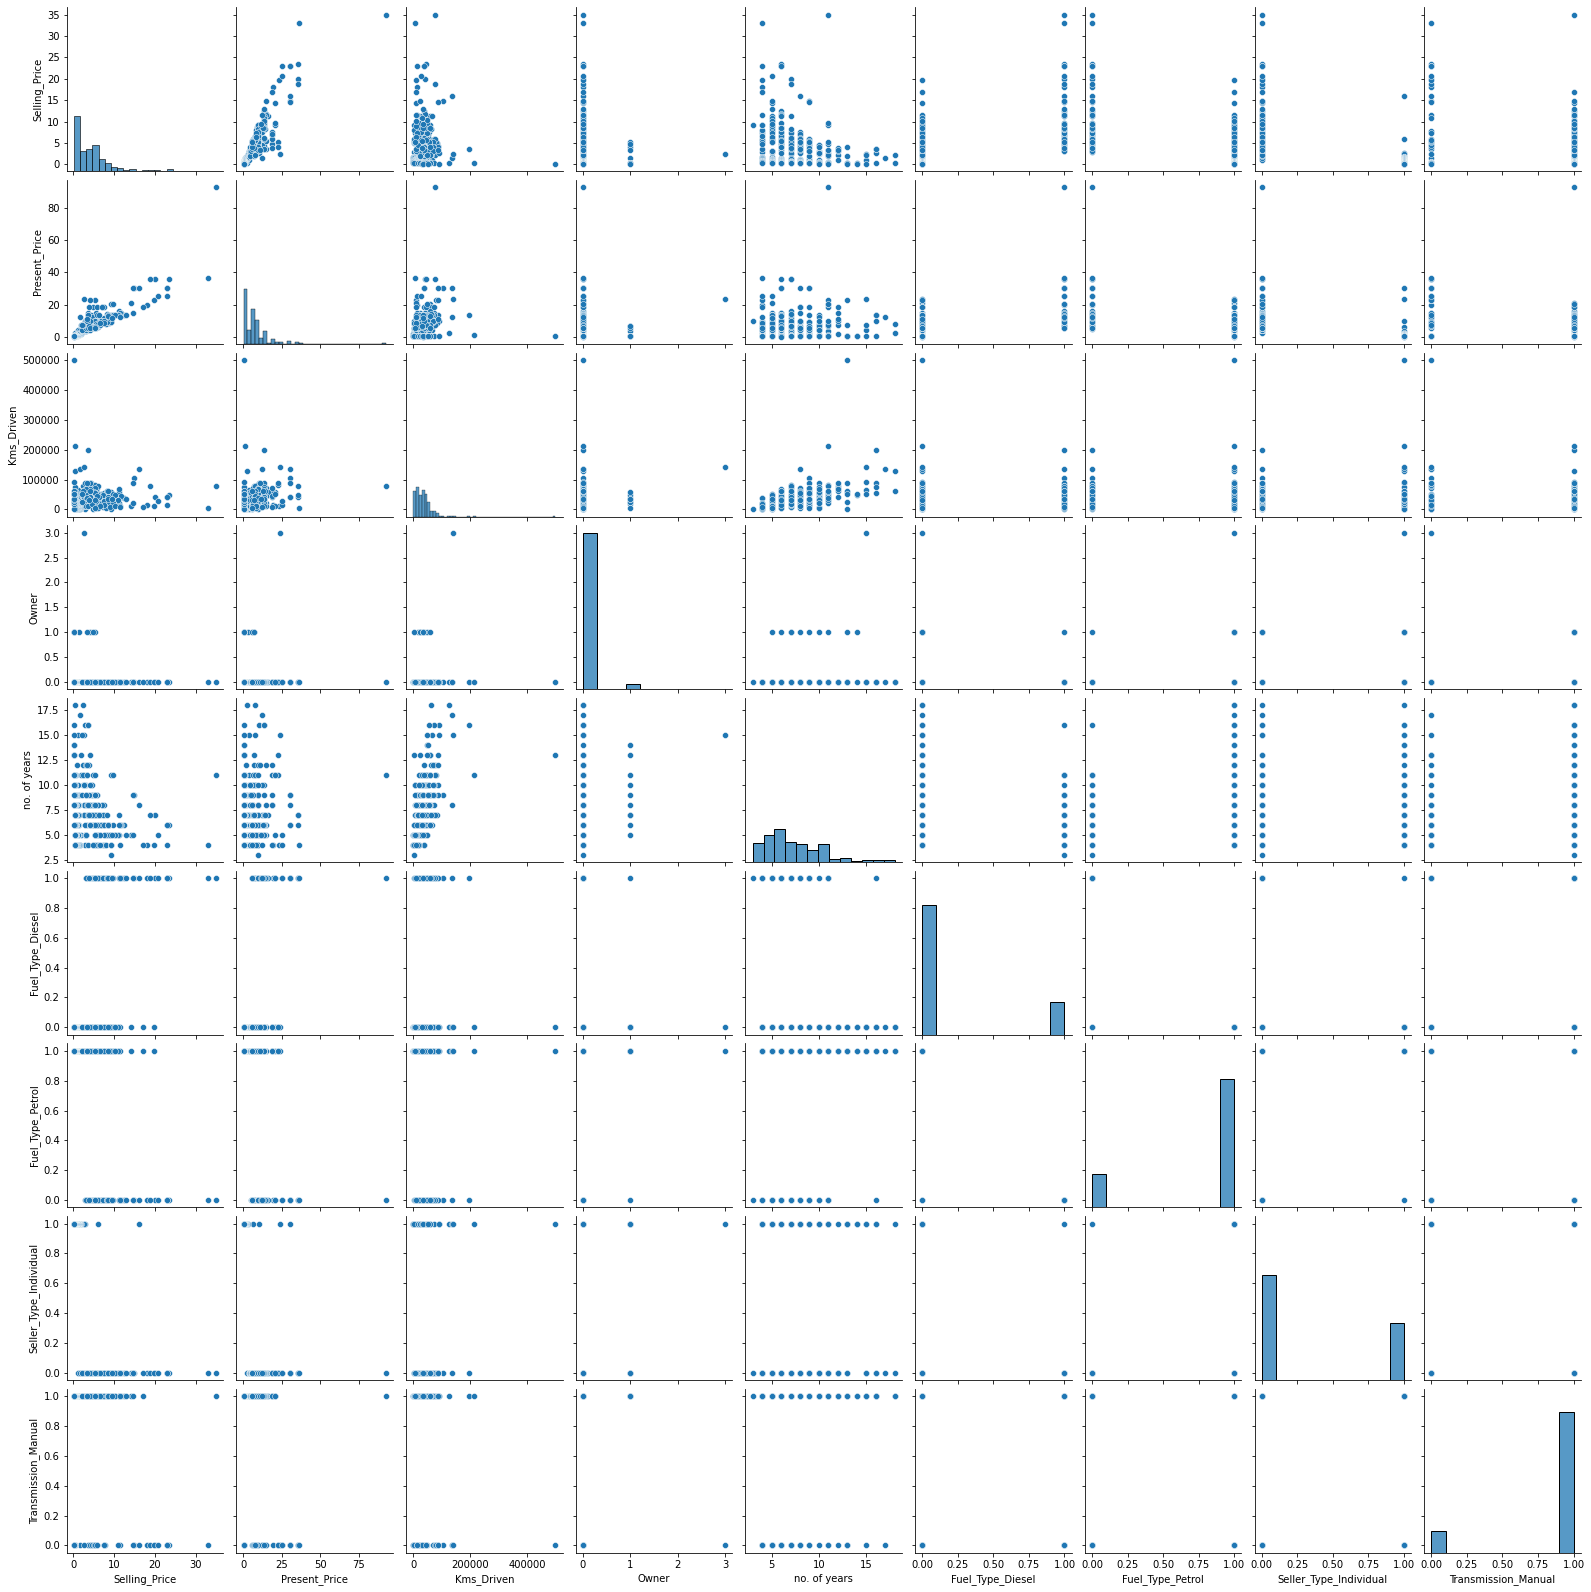

In [21]:
sns.pairplot(dataset)

In [22]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no. of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [23]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

In [24]:
X.head()

,Present_Price,Kms_Driven,Owner,no. of years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [25]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[4.10715470e-01 4.02501691e-02 3.31128526e-04 7.60588048e-02
 2.13641009e-01 1.34318898e-02 1.18903700e-01 1.26667829e-01]


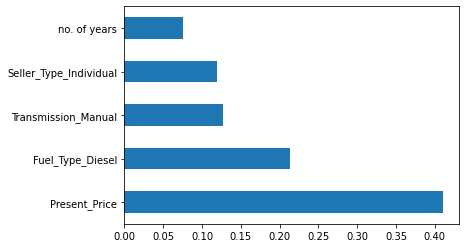

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape

(240, 8)

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [31]:
n_estimators = [100,200,300,400,500,600,700,800,900,1000,1100,1200]

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [33]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [35]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [37]:
predictions=rf_random.predict(X_test)

In [38]:
print(predictions)

[ 1.17891038  0.6358793   0.2316545   0.40947681  6.37168846  0.42305651
  1.19922016  0.33936068  4.72733702  9.50806449  5.92139047  2.82598383
 10.27065226  4.54169023  4.52350446  0.42215639  0.48722119  9.38370286
  0.68215291  3.22406931  0.59592913  2.89556741  5.3902373  10.5024856
  7.40755979  5.46423041  5.87124735  2.60455539  0.66428341 19.74465427
  6.06945429  4.29913733  1.17891038  5.13888086 10.43106198  0.71164331
  1.19540271  1.17247906 18.69910198  0.29658373  2.64153289  4.85350335
  5.99130873  9.01103524  0.42540147  2.82927667  1.17087574  4.56491507
  0.66869701  7.49726205  2.91159759  6.20093174 19.79454808  8.02311998
  4.81275761  2.76711226  6.04496569  1.19364303 10.70598615  7.30261394
  5.23502437]


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

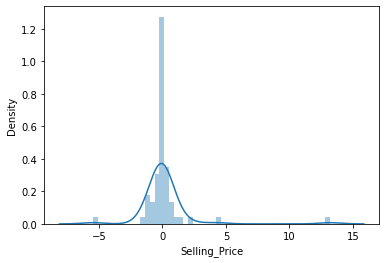

In [39]:
sns.distplot(y_test-predictions)

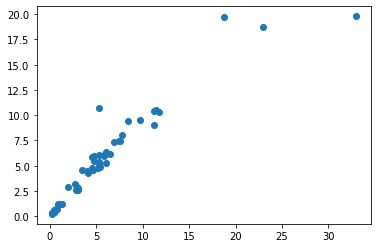

In [40]:
plt.scatter(y_test,predictions)

In [41]:
from catboost import CatBoostRegressor
cat_regressor = CatBoostRegressor()
cat_regressor.fit(X_train,y_train)

Learning rate set to 0.030275
0:	learn: 4.8247448	total: 161ms	remaining: 2m 41s
1:	learn: 4.7429797	total: 167ms	remaining: 1m 23s
2:	learn: 4.6550023	total: 170ms	remaining: 56.4s
3:	learn: 4.5821849	total: 173ms	remaining: 43.1s
4:	learn: 4.4991434	total: 175ms	remaining: 34.8s
5:	learn: 4.4229187	total: 180ms	remaining: 29.8s
6:	learn: 4.3490196	total: 185ms	remaining: 26.3s
7:	learn: 4.2733690	total: 189ms	remaining: 23.5s
8:	learn: 4.2044753	total: 194ms	remaining: 21.3s
9:	learn: 4.1311858	total: 196ms	remaining: 19.4s
10:	learn: 4.0689458	total: 200ms	remaining: 18s
11:	learn: 3.9977379	total: 205ms	remaining: 16.8s
12:	learn: 3.9275495	total: 207ms	remaining: 15.7s
13:	learn: 3.8650794	total: 209ms	remaining: 14.7s
14:	learn: 3.7999015	total: 212ms	remaining: 13.9s
15:	learn: 3.7378296	total: 214ms	remaining: 13.2s
16:	learn: 3.6783879	total: 216ms	remaining: 12.5s
17:	learn: 3.6173686	total: 218ms	remaining: 11.9s
18:	learn: 3.5605109	total: 221ms	remaining: 11.4s
19:	learn: 

232:	learn: 0.7873917	total: 582ms	remaining: 1.92s
233:	learn: 0.7861130	total: 584ms	remaining: 1.91s
234:	learn: 0.7849945	total: 584ms	remaining: 1.9s
235:	learn: 0.7838197	total: 586ms	remaining: 1.9s
236:	learn: 0.7808444	total: 587ms	remaining: 1.89s
237:	learn: 0.7762625	total: 588ms	remaining: 1.88s
238:	learn: 0.7749064	total: 590ms	remaining: 1.88s
239:	learn: 0.7738197	total: 590ms	remaining: 1.87s
240:	learn: 0.7727507	total: 591ms	remaining: 1.86s
241:	learn: 0.7717277	total: 592ms	remaining: 1.85s
242:	learn: 0.7687336	total: 594ms	remaining: 1.85s
243:	learn: 0.7644777	total: 594ms	remaining: 1.84s
244:	learn: 0.7634241	total: 595ms	remaining: 1.83s
245:	learn: 0.7561837	total: 597ms	remaining: 1.83s
246:	learn: 0.7521933	total: 598ms	remaining: 1.82s
247:	learn: 0.7495672	total: 600ms	remaining: 1.82s
248:	learn: 0.7461883	total: 601ms	remaining: 1.81s
249:	learn: 0.7442753	total: 603ms	remaining: 1.81s
250:	learn: 0.7418654	total: 604ms	remaining: 1.8s
251:	learn: 0.7

402:	learn: 0.4882063	total: 880ms	remaining: 1.3s
403:	learn: 0.4880378	total: 882ms	remaining: 1.3s
404:	learn: 0.4869438	total: 883ms	remaining: 1.3s
405:	learn: 0.4856260	total: 885ms	remaining: 1.29s
406:	learn: 0.4842917	total: 886ms	remaining: 1.29s
407:	learn: 0.4839812	total: 887ms	remaining: 1.29s
408:	learn: 0.4838164	total: 888ms	remaining: 1.28s
409:	learn: 0.4823946	total: 890ms	remaining: 1.28s
410:	learn: 0.4821402	total: 891ms	remaining: 1.28s
411:	learn: 0.4811226	total: 892ms	remaining: 1.27s
412:	learn: 0.4808750	total: 894ms	remaining: 1.27s
413:	learn: 0.4806125	total: 895ms	remaining: 1.27s
414:	learn: 0.4803282	total: 897ms	remaining: 1.26s
415:	learn: 0.4801028	total: 899ms	remaining: 1.26s
416:	learn: 0.4787576	total: 900ms	remaining: 1.26s
417:	learn: 0.4785315	total: 902ms	remaining: 1.26s
418:	learn: 0.4772900	total: 904ms	remaining: 1.25s
419:	learn: 0.4760121	total: 907ms	remaining: 1.25s
420:	learn: 0.4751125	total: 908ms	remaining: 1.25s
421:	learn: 0.4

638:	learn: 0.3487568	total: 1.32s	remaining: 746ms
639:	learn: 0.3483486	total: 1.32s	remaining: 744ms
640:	learn: 0.3472962	total: 1.32s	remaining: 742ms
641:	learn: 0.3465019	total: 1.33s	remaining: 739ms
642:	learn: 0.3464711	total: 1.33s	remaining: 737ms
643:	learn: 0.3458386	total: 1.33s	remaining: 734ms
644:	learn: 0.3454889	total: 1.33s	remaining: 732ms
645:	learn: 0.3451449	total: 1.33s	remaining: 730ms
646:	learn: 0.3446756	total: 1.33s	remaining: 727ms
647:	learn: 0.3445151	total: 1.33s	remaining: 724ms
648:	learn: 0.3444671	total: 1.33s	remaining: 722ms
649:	learn: 0.3434769	total: 1.34s	remaining: 720ms
650:	learn: 0.3426060	total: 1.34s	remaining: 717ms
651:	learn: 0.3420953	total: 1.34s	remaining: 715ms
652:	learn: 0.3414492	total: 1.34s	remaining: 713ms
653:	learn: 0.3404327	total: 1.34s	remaining: 710ms
654:	learn: 0.3400118	total: 1.34s	remaining: 708ms
655:	learn: 0.3389192	total: 1.35s	remaining: 706ms
656:	learn: 0.3384317	total: 1.35s	remaining: 704ms
657:	learn: 

871:	learn: 0.2531477	total: 1.75s	remaining: 257ms
872:	learn: 0.2528322	total: 1.75s	remaining: 255ms
873:	learn: 0.2522558	total: 1.75s	remaining: 253ms
874:	learn: 0.2520533	total: 1.76s	remaining: 251ms
875:	learn: 0.2519026	total: 1.76s	remaining: 249ms
876:	learn: 0.2517920	total: 1.76s	remaining: 247ms
877:	learn: 0.2515900	total: 1.76s	remaining: 245ms
878:	learn: 0.2511247	total: 1.76s	remaining: 243ms
879:	learn: 0.2510020	total: 1.76s	remaining: 241ms
880:	learn: 0.2506330	total: 1.77s	remaining: 239ms
881:	learn: 0.2504530	total: 1.77s	remaining: 236ms
882:	learn: 0.2503037	total: 1.77s	remaining: 234ms
883:	learn: 0.2501265	total: 1.77s	remaining: 232ms
884:	learn: 0.2500199	total: 1.77s	remaining: 230ms
885:	learn: 0.2497726	total: 1.77s	remaining: 228ms
886:	learn: 0.2492734	total: 1.77s	remaining: 226ms
887:	learn: 0.2489489	total: 1.77s	remaining: 224ms
888:	learn: 0.2488868	total: 1.78s	remaining: 222ms
889:	learn: 0.2487232	total: 1.78s	remaining: 220ms
890:	learn: 

In [42]:
cat_pred = cat_regressor.predict(X_test)

In [43]:
print(cat_pred)

[ 1.15623263  0.64066383  0.19995614  0.37230371  6.45728859  0.52926492
  1.40052125  0.30051266  4.91846506  9.01790591  5.84990115  2.64943191
 12.49740902  4.24272327  3.8282852   0.38402482  0.42235738  9.0145779
  0.67110635  2.6014356   1.10341236  3.19275829  4.78097999 11.32468486
  7.47373632  5.99417333  4.82487837  2.59872347  0.6049272  20.65783577
  5.35653539  3.7649958   1.16989921  4.76485816  9.89497081  0.8870916
  1.41971042  1.04606701 20.93877947  0.07106738  3.05416866  4.64279116
  5.6654627   9.87442224  0.4652351   2.71989159  0.56517609  4.80590847
  0.62362686  7.47195676  2.41507722  5.22391504 20.34082486  8.05098395
  4.53024271  2.62159027  6.22373241  1.45180009  6.48881305  7.87518577
  3.82883571]


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

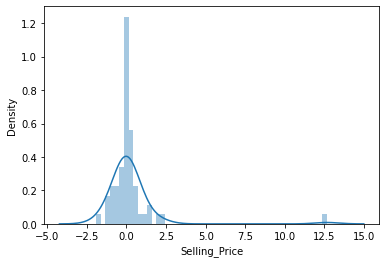

In [44]:
sns.distplot(y_test-cat_pred)

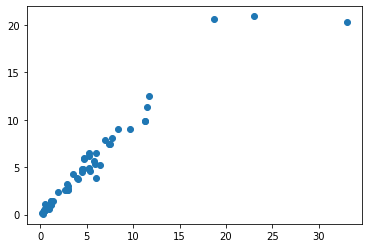

In [45]:
plt.scatter(y_test,cat_pred)

In [46]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7324262037337816
MSE: 3.977744773741662
RMSE: 1.9944284328452755


In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, cat_pred))
print('MSE:', metrics.mean_squared_error(y_test, cat_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, cat_pred)))

MAE: 0.6562187983783029
MSE: 3.1045467230404697
RMSE: 1.7619723956522333


In [49]:
#import pickle
#file1 = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
#pickle.dump(rf_random, file1)

In [50]:
#file2 = open('catboost_model.pkl', 'wb')

# dump information to that file
#pickle.dump(cat_regressor, file2)